In [192]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt

In [193]:
df=pn.read_excel("/Users/denwolper/Desktop/Data_Extract_From_World_Development_Indicators vvishn.xlsx")

In [194]:
df.columns=list(map(lambda x: x[:4] if '[' in x  else x, df.columns))
df.columns=df.columns[:4].append(df.columns[4:].map(pn.to_numeric))

In [195]:
df[df.columns[4:]]=df[df.columns[4:]].apply(pn.to_numeric, errors='coerce')
df[df.columns[:4]]=df[df.columns[:4]].astype(str) 

In [196]:
md=df.set_index(['Country Name', 'Series Name'])
l1=md[(md.index.get_level_values('Series Name')=='Gross capital formation (% of GDP)')].iloc[:,0].unique()
l2=md[(md.index.get_level_values('Series Name')=='Broad money (% of GDP)')].iloc[:,0].unique()
l=np.unique(np.intersect1d(l1,l2))
df=df.loc[df['Country Code'].isin(l)]
df.drop(df.columns[3:4], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.dropna(subset = ['Country Name'], how="any", inplace=True)

In [197]:
s1=df.iloc[(df['Series Name']=='Broad money (% of GDP)').values, 3:].reset_index(drop=True)
s2=df.iloc[(df['Series Name']=='GDP, PPP (constant 2017 international $)').values, 3:].reset_index(drop=True)
df.iloc[(df['Series Name']=='Broad money (% of GDP)').values, 3:]=s1*s2/100
df.iloc[(df['Series Name']=='Broad money (% of GDP)').values, 2]='Broad money $'

In [198]:
s1=df.iloc[(df['Series Name']=='Gross capital formation (% of GDP)').values, 3:].reset_index(drop=True)
df.iloc[(df['Series Name']=='Gross capital formation (% of GDP)').values, 3:]=s1*s2/100
df.iloc[(df['Series Name']=='Gross capital formation (% of GDP)').values, 2]='Gross capital formation USD'

In [199]:
df.fillna(0, inplace=True)
print('\n Preprocessed World Statistics')
df.sort_values(by=['Country Code'])
df.reset_index()
#the preprocession above dropped empty rows and changed from relative (%) to absolut numbers
df  #print cleaned and preprocessed table


 Preprocessed World Statistics


,Country Name,Country Code,Series Name,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,AFG,Broad money $,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.100781e+10,2.128699e+10,2.232099e+10,2.400086e+10,2.414879e+10,2.709274e+10,2.753976e+10,2.767542e+10,2.746312e+10,2.917245e+10
1,Afghanistan,AFG,"GDP per capita, PPP (constant 2017 internation...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.904560e+03,2.075492e+03,2.116465e+03,2.102385e+03,2.068266e+03,2.057068e+03,2.058400e+03,2.033804e+03,2.065036e+03,1.978962e+03
2,Afghanistan,AFG,"GDP, PPP (constant 2017 international $)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.736041e+10,6.467518e+10,6.829747e+10,7.015826e+10,7.117648e+10,7.278529e+10,7.471192e+10,7.560042e+10,7.855761e+10,7.703769e+10
3,Afghanistan,AFG,Gross capital formation USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,Albania,ALB,Broad money $,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.642044e+10,2.744922e+10,2.799316e+10,2.867218e+10,2.901453e+10,3.033434e+10,2.998257e+10,2.951508e+10,3.064201e+10,3.418623e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,Upper middle income,UMC,Gross capital formation USD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.096490e+13,1.146346e+13,1.209263e+13,1.238255e+13,1.224264e+13,1.247515e+13,1.320584e+13,1.390023e+13,1.423705e+13,0.000000e+00
1060,World,WLD,Broad money $,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.089392e+14,1.145779e+14,1.188944e+14,1.256694e+14,1.353983e+14,1.446686e+14,1.480512e+14,1.546040e+14,1.626129e+14,1.815505e+14
1061,World,WLD,"GDP per capita, PPP (constant 2017 internation...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.421485e+04,1.449273e+04,1.479557e+04,1.512762e+04,1.546168e+04,1.578224e+04,1.619115e+04,1.658432e+04,1.686706e+04,1.613548e+04
1062,World,WLD,"GDP, PPP (constant 2017 international $)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.954490e+13,1.026925e+14,1.060794e+14,1.097402e+14,1.134744e+14,1.171750e+14,1.215860e+14,1.259160e+14,1.294268e+14,1.250958e+14


In [200]:
#find and sort best candidateds
#calc Pearson corr for M2 and Investment
#score 1 for Pearson corr>threshold, otherwise 0

df2 = pn.DataFrame(columns=['Name','Code','K','GDPpercap2019', 'GOOD'])
for name in l:
    #settings
    i1=df[df['Country Code']==name].index[0]   #M2
    i2=i1+3                                    #Investment
    i3=i1+1                                    #GDP percap
    thresh=0.65                                #threshold for Pearson corr
    cut_year=-1                                #No2020
    top=30
    #########
    z=df.iloc[[i1,i2],3:cut_year].T
    first=(z.iloc[:,0]>0).idxmax()
    z=z.loc[first:]
    zz=z.corr() 
    if zz.iloc[0,1]>thresh:
        df2.loc[len(df2)] = [(df.iloc[i1,0]),name,zz.iloc[0,1],df.iloc[i3,-1], 1]
    else: 
        if pn.notna(zz.iloc[0,1]):
           df2.loc[len(df2)] = [(df.iloc[i1,0]),name,zz.iloc[0,1],df.iloc[i3,-1], 0]    
gb=len(df2.loc[df2['GOOD']==1])/len(df2)
print(f'\nGood to Bad Correlation Countries Rate {gb:0.2f}')
print(f'Top {top} Good Countries')
df2.set_index('Code').sort_values(['K'])[-top:]


Good to Bad Correlation Countries Rate 0.75
Top 30 Good Countries


,Name,K,GDPpercap2019,GOOD
Code,,,,
TZA,Tanzania,0.974410,2635.335891,1
NPL,Nepal,0.974478,3302.817532,1
LTE,Late-demographic dividend,0.974604,17297.155718,1
IBT,IDA & IBRD total,0.975207,10513.731665,1
PAK,Pakistan,0.975648,4622.770769,1
MIC,Middle income,0.975919,11203.589988,1
LMY,Low & middle income,0.975935,10250.200209,1
ZAF,South Africa,0.976757,11466.189672,1
RWA,Rwanda,0.978200,2098.710362,1


Dropdown(description='Name:', index=112, options=(('Aruba', 'ABW'), ('Africa Eastern and Southern', 'AFE'), ('…

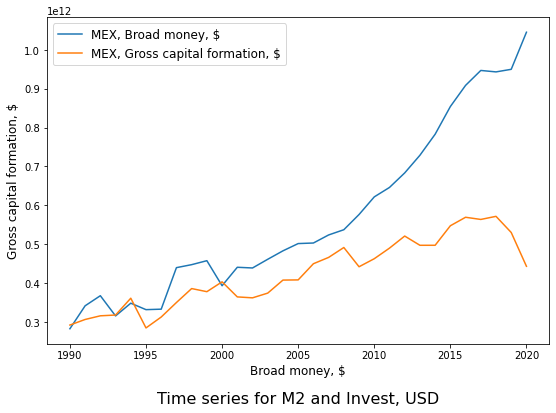

<IPython.core.display.Javascript object>

In [201]:
#experiment with the country selected
#input your country code (from the list above)

from IPython.display import display, clear_output
from IPython.display import Javascript
import ipywidgets as widgets
ls=(df2.loc[:,['Name', 'Code']].to_numpy())
cn=ls[0,1]
ls=[(l[0], l[1]) for l in ls]

drdw=widgets.Dropdown(
    options=ls,
    value=cn,
    description='Name:',
    disabled=False,
)

zpl=0
def fill_pl(): 
      global z, ax, fig, zpl, cn
      i1=df[df['Country Code']==cn].index[0]   #M2
      i2=i1+3                                  #Inv
      z=df.iloc[[i1,i2],3:].T
      first=(z.iloc[:,0]>0).idxmax()
      z=z.loc[first:]
      z.dropna(how="any", inplace=True) 
      clear_output(wait=True)
      ax.clear()
      ax.set_xlabel("Broad money, $", fontsize=12)
      ax.set_ylabel("Gross capital formation, $", fontsize=12)
      ax.set_title('Time series for M2 and Invest, USD', fontsize=16, y=-0.2)
      display(drdw) 
      if not zpl: 
        zpl=ax.plot(z)
        ax.legend([f'{cn}, Broad money, $', f'{cn}, Gross capital formation, $'], fontsize=12)
      else: 
         ax.plot(z)
         ax.legend([f'{cn}, Broad money, $', f'{cn}, Gross capital formation, $'], fontsize=12)
         display(ax.figure)
         display(Javascript("Jupyter.notebook.execute_cells([10,11,12,13,14,15,16])"))
      
             
        
def on_value_change(change):
      global cn
      cn=change['new']
      fill_pl() 
      
            
drdw.observe(on_value_change, names='value')  
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1,1,1)
fill_pl()

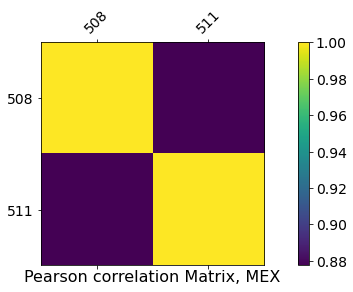

In [220]:
f = plt.figure(figsize=(12, 4))
plt.matshow(z.corr(), fignum=f.number)
plt.xticks(range(z.select_dtypes(['number']).shape[1]), z.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(z.select_dtypes(['number']).shape[1]), z.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Pearson correlation Matrix, '+cn, fontsize=16, y=-0.1);

In [221]:
print(f'\nPearson correlation for {cn} M2 and Investment')
pc=z.corr().reset_index(drop=True)
pc.columns=[0,1]
pc


Pearson correlation for MEX M2 and Investment


,0,1
0,1.000000,0.877412
1,0.877412,1.000000


In [222]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
reg  = linear_model.LassoLars(alpha=.1, normalize=True)

In [223]:
%%capture
data=z[:-1].to_numpy()
reg.fit(data[:,0,np.newaxis], data[:,1])

In [224]:
s=data.shape[0]
m1=data[:,0].max()
m2=data[:,0].min()
mm=np.linspace(m2, m1, num=s)
pp=reg.predict(mm[:,np.newaxis])
k1=reg.coef_[0]
k0=reg.intercept_
r2=r2_score(data[:,1], pp)

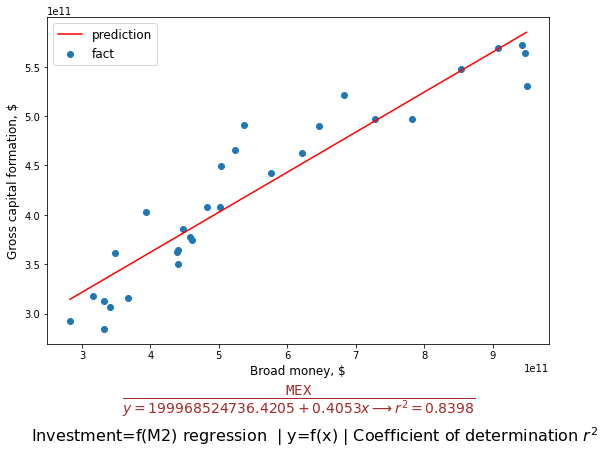

In [225]:
plt.figure(figsize=(9, 6))
plt.scatter(data[:,0],data[:,1])
plt.plot(mm,pp, color='r')
tfy=r'$\frac{\mathtt{'+f'{cn}'+r'}}{'+f'y={k0:.4f}+{k1:.4f}x '+r'\longrightarrow r^2' +f'={r2:.4f}'+r'}$'
plt.title(tfy, y=-0.2, fontsize=20, color='brown')
plt.xlabel("Broad money, $", fontsize=12)
plt.ylabel("Gross capital formation, $", fontsize=12)
plt.legend(["prediction",'fact'], fontsize=12)
plt.text(x=0.1, y=-0.1, s='Investment=f(M2) regression  | y=f(x) | Coefficient of determination '+r'$r^2$', fontsize=16, transform=plt.gcf().transFigure);

In [226]:
%%capture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import normalize
neigh = KNeighborsClassifier(n_neighbors=3)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.6, random_state=0)
X=normalize(df2.loc[:,['K','GDPpercap2019']].to_numpy(), axis=0)
y=df2.loc[:,['GOOD']].to_numpy().astype('int').ravel()
sss.get_n_splits(X, y)

In [209]:
%%capture
for train_index, test_index in sss.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
neigh.fit(X_train, y_train)     

In [210]:
x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/50), np.arange(y_min, y_max, (y_max-y_min)/50))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

Classification accuracy 0.98


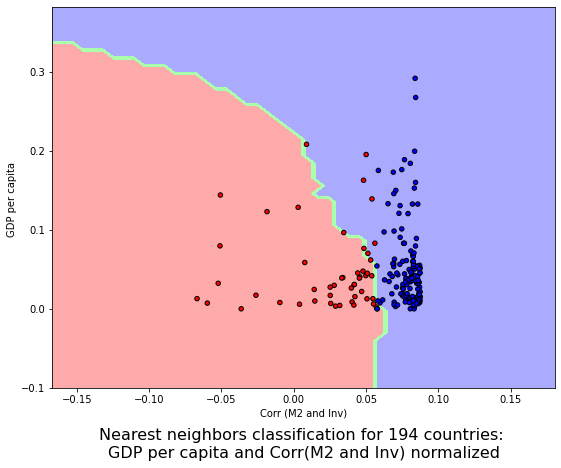

In [211]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(9, 7))
plt.contourf(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Corr (M2 and Inv)')
plt.ylabel('GDP per capita ')
plt.title(f'Nearest neighbors classification for {len(df2)} countries: \nGDP per capita and Corr(M2 and Inv) normalized', fontsize=16, y=-0.2)
ce=1-sum(neigh.predict(X_test)-y_test)/y_test.shape[0]
print(f'Classification accuracy {ce:0.2f}')

In [212]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')